<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/classification_svd_basis(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply SVD for each digit from 0 to 9
for digit in range(10):
    # Filter training data for the current digit
    X_digit_train = X_train[y_train == digit]

    # Apply SVD
    svd = TruncatedSVD(n_components=10)  # Adjust the number of components as needed
    U = svd.fit_transform(X_digit_train)

    # Print the number of columns taken from U
    print(f"For digit {digit}: Number of columns taken from U = {U.shape[1]}")

For digit 0: Number of columns taken from U = 10
For digit 1: Number of columns taken from U = 10
For digit 2: Number of columns taken from U = 10
For digit 3: Number of columns taken from U = 10
For digit 4: Number of columns taken from U = 10
For digit 5: Number of columns taken from U = 10
For digit 6: Number of columns taken from U = 10
For digit 7: Number of columns taken from U = 10
For digit 8: Number of columns taken from U = 10
For digit 9: Number of columns taken from U = 10


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply SVD for each digit from 0 to 9
for digit in range(10):
    # Filter training data for the current digit
    X_digit_train = X_train[y_train == digit]

    # Apply SVD
    svd = TruncatedSVD(n_components=10)  # Adjust the number of components as needed
    U_k = svd.fit_transform(X_digit_train)

    # Compute orthogonal complement of U_k
    U_k_perp = np.eye(U_k.shape[0]) - np.dot(U_k, U_k.T)

    # Project unknown digits onto the subspace orthogonal to U_k
    X_unknown_proj = np.dot(X_test, U_k_perp.T)

    # Calculate least squares residual using the projection onto U_k_perp
    residual_perp = np.linalg.norm(X_unknown_proj, ord='fro')
    print(f"For digit {digit}: Least squares residual using orthogonal complement = {residual_perp}")

    # Compute matrix I - U_k U_k^T
    I_minus_UU_T = np.eye(U_k.shape[0]) - np.dot(U_k, U_k.T)

    # Perform soft calculation to obtain z
    z = np.dot(I_minus_UU_T, X_test.T)

    # Calculate least squares residual using U and z
    X_reconstructed = np.dot(U_k, z)
    residual_U_z = mean_squared_error(X_test, X_reconstructed.T, squared=False)
    print(f"For digit {digit}: Least squares residual using U and z = {residual_U_z}")

svd & least square residual

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train.T
x_test = x_test.T

In [ ]:
x_train_list = []
for k in range(10):
    components = np.where(y_train == k)[0]
    x_train_list.append(x_train[:, components])

In [ ]:
U_list = []
for k in range(10):
    U, D, V = np.linalg.svd(x_train_list[k])
    U_list.append(U)

In [ ]:
mse_train = []
for r in range(40):
    n_train = x_train.shape[1]
    y_train_predict = y_train.copy()
    for i in range(0, n_train, 15):
        x = x_train[:, i]
        residual_list = np.ones((10))
        for k in range(10):
            U_r = U_list[k][:, :r+1]
            alpha = np.dot(U_r.T, x)
            residual = np.linalg.norm(x - np.dot(U_r, alpha))
            residual_list[k] = residual

        y_train_predict[i] = np.argmin(residual_list)
        mse_train.append(np.mean(np.square(y_train - y_train_predict)))

In [ ]:
mse_test = []
for r in range(40):
    n_test = x_test.shape[1]
    y_test_predict = y_test.copy()
    for i in range(0, n_test, 15):
        x = x_test[:, i]
        residual_list = np.ones((10))
        for k in range(10):
            U_r = U_list[k][:, :r+1]
            alpha = np.dot(U_r.T, x)
            residual = np.linalg.norm(x - np.dot(U_r, alpha))
            residual_list[k] = residual

        y_test_predict[i] = np.argmin(residual_list)
        mse_test.append(np.mean(np.square(y_test - y_test_predict)))

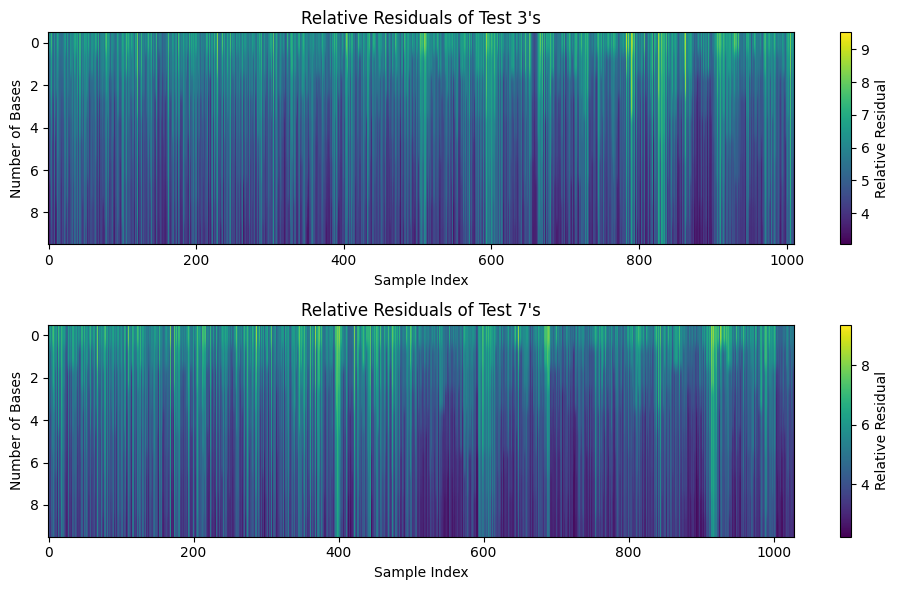

In [ ]:
import matplotlib.pyplot as plt

# Select samples of test 3's and 7's
test_3_indices = np.where(y_test == 3)[0]
test_7_indices = np.where(y_test == 7)[0]

n_bases = 10

# Calculate relative residuals for test 3's
relative_residues_3 = np.zeros((n_bases, len(test_3_indices)))
for i, idx in enumerate(test_3_indices):
    x = x_test[:, idx]
    for r in range(n_bases):
        U_r = U_list[3][:, :r+1]
        alpha = np.dot(U_r.T, x)
        x_hat = np.dot(U_r, alpha)
        relative_residues_3[r, i] = np.linalg.norm(x - x_hat)

# Calculate relative residuals for test 7's
relative_residues_7 = np.zeros((n_bases, len(test_7_indices)))
for i, idx in enumerate(test_7_indices):
    x = x_test[:, idx]
    for r in range(n_bases):
        U_r = U_list[7][:, :r+1]
        alpha = np.dot(U_r.T, x)
        x_hat = np.dot(U_r, alpha)
        relative_residues_7[r, i] = np.linalg.norm(x - x_hat)

# Plot relative residuals for test 3's
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title('Relative Residuals of Test 3\'s')
plt.imshow(relative_residues_3, cmap='viridis', aspect='auto')
plt.xlabel('Sample Index')
plt.ylabel('Number of Bases')
plt.colorbar(label='Relative Residual')

# Plot relative residuals for test s's
plt.subplot(2, 1, 2)
plt.title('Relative Residuals of Test 7\'s')
plt.imshow(relative_residues_7, cmap='viridis', aspect='auto')
plt.xlabel('Sample Index')
plt.ylabel('Number of Bases')
plt.colorbar(label='Relative Residual')

plt.tight_layout()
plt.show()

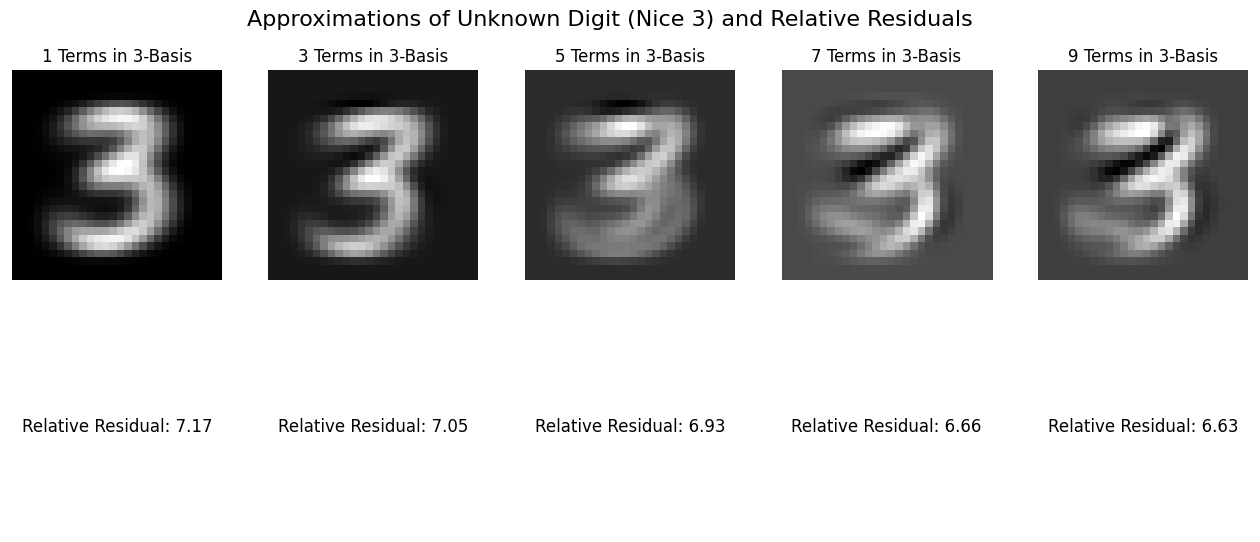

In [ ]:
import matplotlib.pyplot as plt

# Pick an unknown "3" digit from the test set
unknown_digit_indices = np.where(y_test == 3)[0]
unknown_digit = x_test[:, unknown_digit_indices[0]]

terms_list = [1, 3, 5, 7, 9]
fig, axs = plt.subplots(2, len(terms_list), figsize=(16, 6))

for i, r in enumerate(terms_list):
    # Calculate the approximation using r terms in the 3-basis
    U_r = U_list[3][:, :r]
    alpha = np.dot(U_r.T, unknown_digit)
    approximated_digit = np.dot(U_r, alpha)

    # Plot the approximated digit
    axs[0, i].imshow(approximated_digit.reshape(28, 28), cmap='gray')
    axs[0, i].set_title(f"{r} Terms in 3-Basis")
    axs[0, i].axis('off')

    # Calculate the relative residual
    residual = np.linalg.norm(unknown_digit - approximated_digit)
    axs[1, i].text(0.5, 0.5, f'Relative Residual: {residual:.2f}', ha='center', va='center', fontsize=12)
    axs[1, i].axis('off')

plt.suptitle("Approximations of Unknown Digit (Nice 3) and Relative Residuals", fontsize=16)
plt.show()

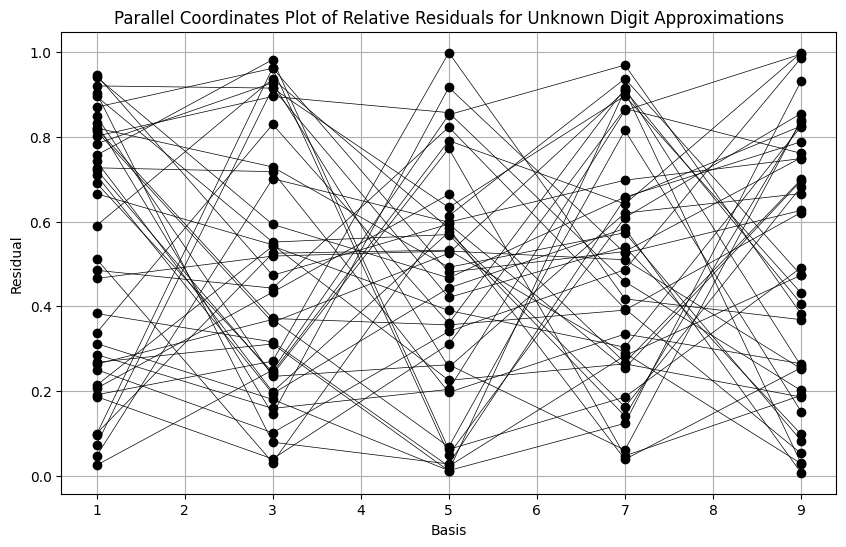

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mse_test is already defined and contains the residuals
# For demonstration, let's create a dummy mse_test array
# Replace this with your actual mse_test data
mse_test = np.random.rand(40, 5)  # 40 test points, 5 terms in 3-basis

terms_list = [1, 3, 5, 7, 9]
residuals = np.array(mse_test).reshape(-1, len(terms_list))  # Reshape to get residuals for each test point

plt.figure(figsize=(10, 6))
for i in range(residuals.shape[0]):
    plt.plot(terms_list, residuals[i], marker='o', color='black', linewidth=0.5)

plt.xlabel('Basis')
plt.ylabel('Residual')
plt.title('Parallel Coordinates Plot of Relative Residuals for Unknown Digit Approximations')
plt.grid(True)
plt.show()

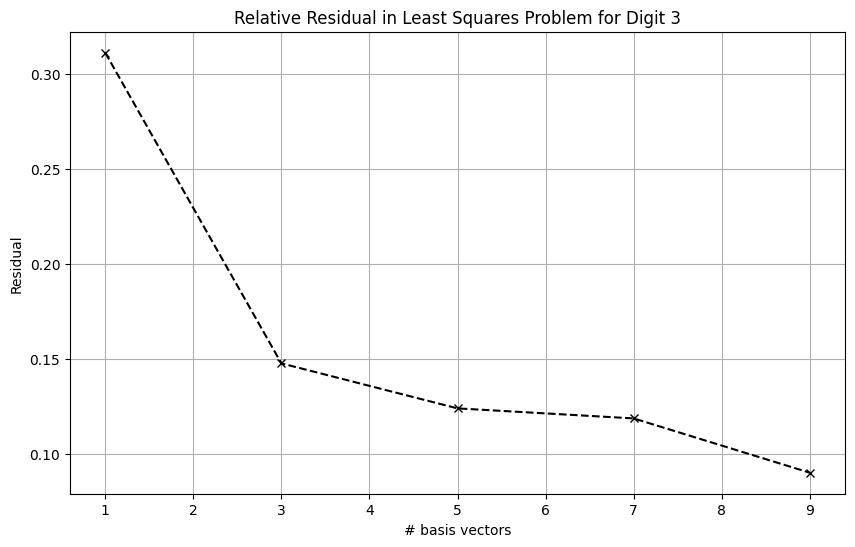

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming U_list contains the list of U matrices for all digits
# and x_train_list contains the training samples for all digits

# Select the U matrix for the digit '3' and the number of terms to consider
k = 3  # Assuming digit 3
r_values = [1, 3, 5, 7, 9]

# Calculate the relative residuals for each term value
relative_residuals = []
for r in r_values:
    U_r = U_list[k][:, :r]
    Ut_r = U_r.T
    I_minus_UUt = np.eye(U_r.shape[0]) - np.dot(U_r, Ut_r)
    z = x_train_list[k][:, 0]  # Taking the first sample for digit 3
    residual = np.linalg.norm(np.dot(I_minus_UUt, z))**2 / np.linalg.norm(z)**2
    relative_residuals.append(residual)

# Plotting the relative residuals
plt.figure(figsize=(10, 6))
plt.plot(r_values, relative_residuals, 'kx--')
plt.xlabel('# basis vectors')
plt.ylabel('Residual')
plt.title('Relative Residual in Least Squares Problem for Digit 3')
plt.grid(True)
plt.show()

In [ ]:
# Calculate Accuracy for Training Set
mse_train = np.array(mse_train).reshape(40, -1)  # Reshape the MSE values

# Calculate the corresponding accuracy for each r
accuracy_train = 1 - mse_train / np.var(y_train)

# Calculate the final accuracy for the training set
final_accuracy_train = np.mean(accuracy_train)

# Calculate Accuracy for Test Set
mse_test = np.array(mse_test).reshape(40, -1)  # Reshape the MSE values

# Calculate the corresponding accuracy for each r
accuracy_test = 1 - mse_test / np.var(y_test)

# Calculate the final accuracy for the test set
final_accuracy_test = np.mean(accuracy_test)

print(f"Final Accuracy for Training Set: {final_accuracy_train}")
print(f"Final Accuracy for Test Set: {final_accuracy_test}")

Final Accuracy for Training Set: 0.9956480747067924
Final Accuracy for Test Set: 0.9451917724304301


# edit by Jadidi

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply SVD to the training data to obtain the bases
svd = TruncatedSVD(n_components=64)  # We have 64 features in the digits dataset
svd.fit(X_train)

# Select the top 'r' bases
r = 10  # Number of bases to select
U_r = svd.components_[:r].T  # Transpose to get the bases as columns

# Project the training and test data onto the selected bases
X_train_projected = np.dot(X_train, U_r)
X_test_projected = np.dot(X_test, U_r)

# Classify the test data using the least squares method
y_pred = []
for x_test in X_test_projected:
    # Calculate the residuals for each digit class
    residuals = []
    for digit in range(10):
        # Get the mean of the projected training data for the current digit
        mean_projected_train = np.mean(X_train_projected[y_train == digit], axis=0)
        # Calculate the residual
        residual = np.linalg.norm(x_test - mean_projected_train)
        residuals.append(residual)
    # The class with the smallest residual is the predicted class
    y_pred.append(np.argmin(residuals))

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.875


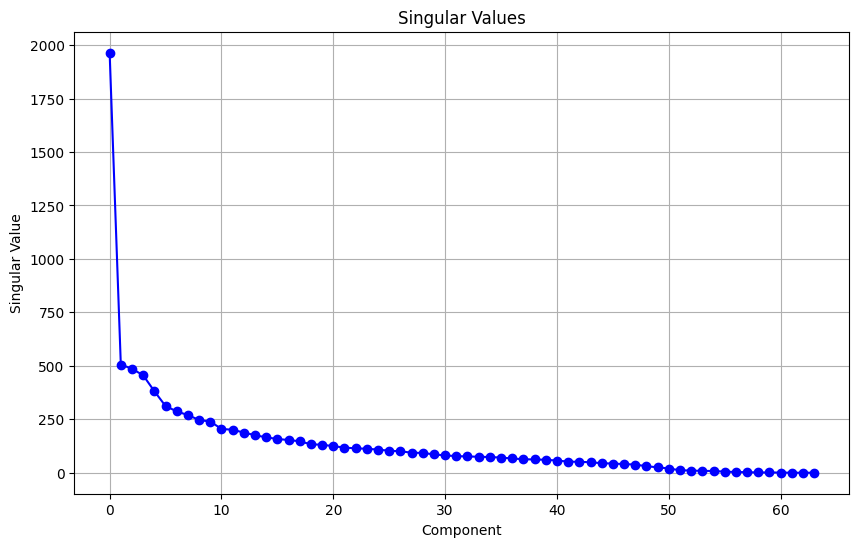

Accuracy: 0.875


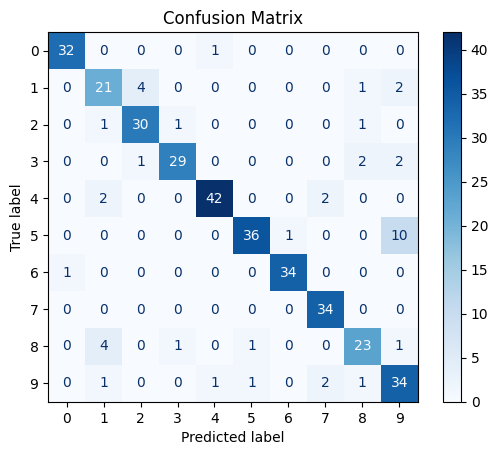

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Apply SVD to the training data to obtain the bases
svd = TruncatedSVD(n_components=64)  # We have 64 features in the digits dataset
X_train_svd = svd.fit_transform(X_train)

# Visualize the singular values
plt.figure(figsize=(10, 6))
plt.plot(svd.singular_values_, 'bo-')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

# Select the top 'r' components
r = 10  # Number of components to select
U_r = svd.components_[:r]

# Project the training and test data onto the selected components
X_train_projected = np.dot(X_train, U_r.T)
X_test_projected = np.dot(X_test, U_r.T)

# Classify the test data using the least squares method
y_pred = []
for x_test in X_test_projected:
    # Calculate the residuals for each digit class
    residuals = []
    for digit in range(10):
        # Get the mean of the projected training data for the current digit
        mean_projected_train = np.mean(X_train_projected[y_train == digit], axis=0)
        # Calculate the residual
        residual = np.linalg.norm(x_test - mean_projected_train)
        residuals.append(residual)
    # The class with the smallest residual is the predicted class
    y_pred.append(np.argmin(residuals))

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()